# import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data

In [2]:
amazon= pd.read_csv('/Users/t-2024-m0196/my-repo/Git/Git/실전프로젝트/amazon_이상치처리.csv')

amazon.info()
amazon.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64223 entries, 0 to 64222
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Date                      64223 non-null  object 
 4   Invoice Number                    64223 non-null  int64  
 5   Item                              64223 non-null  object 
 6   Line Number                       64223 non-null  int64  
 7   List Price                        64223 non-null  float64
 8   Order Number                      64223 non-null  int64  
 9   Sales Amount                      64223 non-null  float64
 10  Sales Amount Based on List Price  64223 non-null  float64
 11  Sales Cost Amount                 64223 non-null  float64
 12  Sale

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10016609,12/31/2019,398.73,2019/12/31,329568,Super Vegetable Oil,1000,163.47,122380,418.62,817.35,102.99,315.63,83.724,5,176,EA
1,10016609,12/31/2019,268.67,2019/12/31,329569,Golden Fajita French Fries,7000,275.37,123966,282.07,550.74,117.45,164.62,141.035,2,176,EA
2,10016609,12/31/2019,398.73,2019/12/31,329569,Super Vegetable Oil,4000,163.47,123966,418.62,817.35,102.99,315.63,83.724,5,176,EA


In [3]:
print(amazon.shape)
amazon.isna().sum()

(64223, 17)


Custkey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [4]:
temp= amazon['Custkey'].value_counts()
print(len(temp[temp > 1]))
# 64223 개의 Custkey 데이터 중에 중복구매한 사용자 수 579
print(len(temp[temp==1]))
# 1인 사람 23개
print(len(temp))

579
23
602


In [5]:
amazon['Order Number'].value_counts()

Order Number
222244    126
210770    126
110770    124
122244    124
205051    121
         ... 
116597      1
116631      1
116633      1
116644      1
216774      1
Name: count, Length: 17043, dtype: int64

In [6]:
amazon[amazon['Order Number'] == 222244].head(3)

# 주문 번호가 같은 게 126건 -> 살펴보니 구매한 날짜, 구매한 금액 등 달라서
# Invoice Number를 식별키?

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
34543,10012715,12/29/2017,499.22,2017/12/29,130332,Bravo Beef Soup,43000,57.11,222244,528.76,1027.98,175.97,352.79,29.375556,18,180,EA
35132,10012715,12/22/2017,791.39,2017/12/22,129723,Cutting Edge Cole Slaw,51000,135.80,222244,838.21,1629.60,476.71,361.50,69.850833,12,180,EA
35601,10012715,12/17/2017,503.07,2017/12/17,129363,Bravo Canned Yams,149000,207.18,222244,532.83,1035.90,299.02,233.81,106.566000,5,180,EA


In [7]:
temp1 = amazon['Invoice Number'].value_counts()
print(len(temp1[temp1 > 1]))
print(len(temp1[temp1 == 1]))
amazon[amazon['Invoice Number']== 225396].head(3)
amazon[(amazon['Invoice Number']== 225396)& (amazon['DateKey'] == '3/11/2018')].head(3)
# 주문일 전부 같음.

print(amazon[(amazon['Invoice Number'] == 225396) & (amazon['DateKey'] == '3/11/2018')].shape[0])
print(amazon[amazon['Invoice Number']== 225396].shape[0])
# 동일

7850
16016
103
103


In [8]:
print('총 매출: ', amazon['Sales Amount'].sum())
print('총 할인 금액: ', amazon['Discount Amount'].sum())
print('총 주문 수: ', amazon['Order Number'].sum())

총 매출:  173065707.75
총 할인 금액:  124755409.47259998
총 주문 수:  11533713451


# 고객별 Sales Amount

In [9]:
cust_m= amazon.groupby('Custkey')['Sales Amount'].sum().reset_index()

cust_m.sort_values(by= 'Sales Amount', ascending= False)

,Custkey,Sales Amount
394,10021485,11032812.24
133,10009676,10494875.71
382,10021300,8707904.14
492,10025024,8078013.74
504,10025052,5433005.93
...,...,...
483,10024880,229.27
332,10020306,228.02
562,10026009,224.55
200,10013039,216.20


In [10]:
# R, F

cust_rf = amazon.groupby('Custkey').agg(
    Last_Purchase=('Invoice Date', 'max')
    , Frequency=('Order Number', 'nunique')
).reset_index()

cust_rf

,Custkey,Last_Purchase,Frequency
0,10000453,2019/12/30,55
1,10000455,2017/11/04,12
2,10000456,2019/11/11,16
3,10000457,2019/11/22,8
4,10000458,2019/08/05,6
...,...,...,...
597,10027381,2018/03/14,21
598,10027560,2017/12/26,15
599,10027572,2019/11/30,19
600,10027575,2018/03/06,4


# RFM 컬럼 602개

In [11]:
cust_rfm= cust_rf.merge(cust_m, on= 'Custkey')

cust_rfm= cust_rfm.rename(columns= {'Last_Purchase': 'Recency',
                          'Sales Amount': 'Monetary'})

In [12]:
cust_rfm.info()
cust_rfm.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Custkey    602 non-null    int64  
 1   Recency    602 non-null    object 
 2   Frequency  602 non-null    int64  
 3   Monetary   602 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 18.9+ KB


,Custkey,Recency,Frequency,Monetary
0,10000453,2019/12/30,55,180549.30
1,10000455,2017/11/04,12,22403.73
2,10000456,2019/11/11,16,227440.19


In [13]:
cust_rfm['Recency'].sort_values()
# 2017 05 08 ~ 2019 12 31

512    2017/05/08
156    2017/05/08
295    2017/05/16
338    2017/06/16
562    2017/06/18
          ...    
417    2019/12/31
568    2019/12/31
232    2019/12/31
191    2019/12/31
263    2019/12/31
Name: Recency, Length: 602, dtype: object

In [14]:
# recency datetime으로 변환
cust_rfm['Recency']= pd.to_datetime(cust_rfm['Recency'])

# 2020 01 01을 현재날짜로 설정
cust_rfm['Recency']= dt.datetime(2020, 1, 1) - cust_rfm['Recency']
# 01로 하니까 오류남

# 2020 01 01을 현재날짜로 간주하고 가장 최근의 주문 일자를 뺌
cust_rfm['Recency']= cust_rfm['Recency'].apply(lambda x:x.days+1)

cust_rfm

,Custkey,Recency,Frequency,Monetary
0,10000453,3,55,180549.30
1,10000455,789,12,22403.73
2,10000456,52,16,227440.19
3,10000457,41,8,29723.40
4,10000458,150,6,103528.05
...,...,...,...,...
597,10027381,659,21,70994.97
598,10027560,737,15,48482.74
599,10027572,33,19,92219.07
600,10027575,667,4,3548.62


,Custkey,Recency,Frequency,Monetary
count,6.020000e+02,602.000000,602.000000,6.020000e+02
mean,1.001670e+07,329.667774,28.310631,2.874846e+05
std,7.910164e+03,331.609160,44.985021,9.270235e+05
min,1.000045e+07,2.000000,1.000000,2.155700e+02
25%,1.001091e+07,18.000000,5.000000,1.211964e+04
50%,1.001917e+07,149.000000,15.000000,5.423323e+04
75%,1.002366e+07,670.000000,31.750000,1.923753e+05
max,1.002758e+07,969.000000,458.000000,1.103281e+07


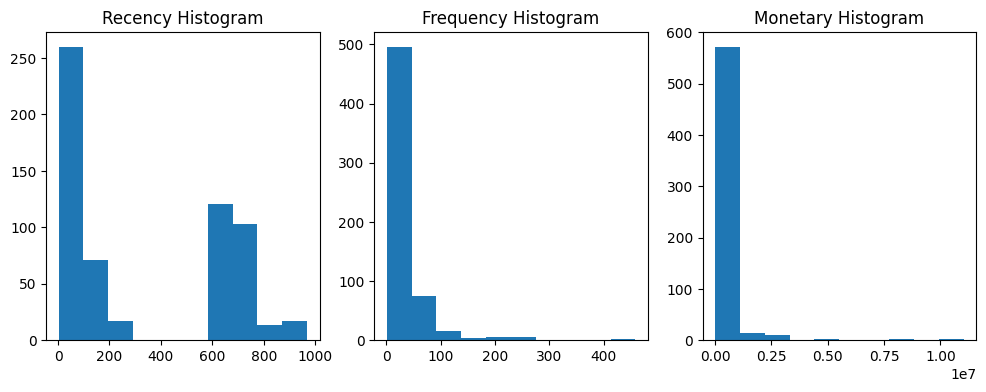

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

# plt.ticklabel_format(style = 'plain')
ax1.set_title('Recency Histogram')
ax1.hist(cust_rfm['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_rfm['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_rfm['Monetary'])

# 모두 왜곡된 값 분포
# recency의 경우 약 250~600 까지의 기간동안 공백 존재

cust_rfm.describe()

In [16]:
sorted(cust_rfm['Recency'].unique())

# 235~651까지의 기간 증발...
# 235일 전부터 651일 전까지의 기간은 2018년 3월 13일부터 2019년 5월 10일까지
# -> 왜???????

[np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(100),
 np.int64(102),
 np.int64(104),
 np.int64(107),
 np.int64(108),
 np.int64(109),
 np.int64(114),
 np.int64(115),
 np.int64(116),
 np.int64(118),
 np.int64(121),
 np.int64(122),
 np.int64(123),
 np.int64(125),
 np.int64(128),
 np.int64(129),
 np.int64(130),
 np.int64(132),
 np.int64(136),
 np.int64(138),
 np.int64(139),
 np.int64(143),
 np.int64

In [21]:
# AOV: 객단가, 고객이 지출하는 평균 주문 금액
AOV = sum(cust_rfm['Monetary'])/len(cust_rfm['Custkey'])

print(round(AOV, 2))

287484.56
